In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
#from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [110]:
df = pd.read_csv('data/exams.csv')

In [111]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [112]:
# df['total score'] = df['math score'] + df['reading score'] + df['writing score']
# #df['average score'] = df['total score']/3
# df.head()

In [113]:
X = df.drop(columns=['writing score'],axis=1)

In [114]:
y = df['writing score']

In [115]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score
0,female,group D,some college,standard,completed,59,70
1,male,group D,associate's degree,standard,none,96,93
2,female,group D,some college,free/reduced,none,57,76
3,male,group B,some college,free/reduced,none,70,70
4,female,group D,associate's degree,standard,none,83,85


In [116]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [117]:
X = preprocessor.fit_transform(X)

In [118]:
X.shape

(1000, 19)

In [119]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.57798657, -0.02709151],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         1.84942581,  1.60407283],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -0.70919805,  0.39842962],
       ...,
       [ 1.        ,  0.        ,  1.        , ...,  0.        ,
        -0.05314065,  1.10763151],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         0.79973397,  0.11474887],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
        -0.64359231, -1.65825585]])

In [120]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [121]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [122]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    #"CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 3.6302
- Mean Absolute Error: 2.9239
- R2 Score: 0.9437
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.4632
- Mean Absolute Error: 2.7393
- R2 Score: 0.9370


Lasso
Model performance for Training set
- Root Mean Squared Error: 4.9016
- Mean Absolute Error: 3.9255
- R2 Score: 0.8973
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.4945
- Mean Absolute Error: 3.5549
- R2 Score: 0.8939


Ridge
Model performance for Training set
- Root Mean Squared Error: 3.6291
- Mean Absolute Error: 2.9205
- R2 Score: 0.9437
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.4542
- Mean Absolute Error: 2.7359
- R2 Score: 0.9373


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.2283
- Mean Absolute Error: 3.3358
- R2 Score: 0.9236
-----------------------

In [123]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.937349
0,Linear Regression,0.937020
5,Random Forest Regressor,0.915908
6,XGBRegressor,0.910579
7,AdaBoost Regressor,0.909132
1,Lasso,0.893926
3,K-Neighbors Regressor,0.857532
4,Decision Tree,0.822385


In [124]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 93.70


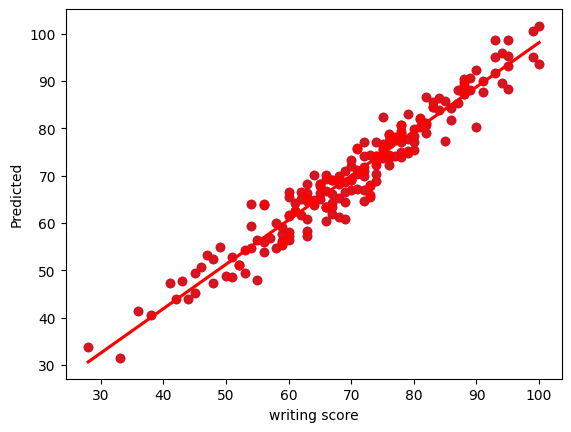

In [125]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [126]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,70,72.031250,-2.031250
737,80,75.343750,4.656250
740,58,54.687500,3.312500
660,66,66.718750,-0.718750
411,78,74.953125,3.046875
...,...,...,...
408,87,88.109375,-1.109375
332,63,57.265625,5.734375
208,58,60.015625,-2.015625
613,64,70.140625,-6.140625
